In [1]:
! pip install kaggle

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download fedesoriano/body-fat-prediction-dataset

! unzip body-fat-prediction-dataset.zip

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error, r2_score

algorithms = {
    'linear_model' : LinearRegression(),
    'Lasso':         Lasso(),
    'RandomForestRegressor': RandomForestRegressor(),
    'Nueral_Network' : MLPRegressor()
}


plt.style.use('ggplot')


data = pd.read_csv('bodyfat.csv')

data.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [3]:
data.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [4]:
data2 = data.copy()

In [5]:
data.head(5)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [6]:
fat = data.BodyFat

np.percentile(fat, [0.025,99.75])

array([ 0.043925, 42.8565  ])

In [7]:
data[data['BodyFat'] > 42].index[0]

215

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


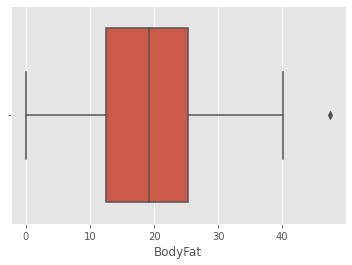

In [8]:
sns.boxplot(fat)

In [9]:
def preprocessing(data):
  df = data.copy()

  df['Weight_kg'] = df.Weight * 0.45359237
  df['Height_cm'] = df.Height * 2.54
  df['BMI'] = df['Weight_kg'] / (df['Height_cm'] / 100) ** 2

  df = df.drop(df[df['BodyFat'] > 42].index[0], axis = 0)
  df = df.drop(df[df['BodyFat'] < 1].index[0], axis = 0)
  df = df.drop(df[df['BMI'] > 35].index.tolist(), axis = 0)


  df = df.drop(['Density','Weight','Height'], axis = 1)

  X = df.drop('BodyFat', axis = 1)
  y = df['BodyFat']

  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 40)
  
  sc = StandardScaler()
  sc.fit(X_train)

  X_train = pd.DataFrame(sc.transform(X_train), columns = X_train.columns)
  X_test = pd.DataFrame(sc.transform(X_test), columns = X_test.columns)


  return X_train, X_test, y_train, y_test, df

In [10]:
X_train, X_test, y_train, y_test, df = preprocessing(data)

In [11]:
for name, model in algorithms.items():
  model.fit(X_train, y_train)
  score = model.score(X_test, y_test)
  pred = model.predict(X_test)
  RMSE = mean_squared_error(y_test, pred, squared = False)
  R2 = r2_score(y_test, pred)

  print('********* Model : {}'.format(name))
  print('RMSE = {}'.format(RMSE))
  print('R2 = {}'.format(R2))

********* Model : linear_model
RMSE = 4.039382246498755
R2 = 0.7324269879676226
********* Model : Lasso
RMSE = 4.415732951224222
R2 = 0.680244513969029
********* Model : RandomForestRegressor
RMSE = 4.866562754141775
R2 = 0.611619820045116
********* Model : Nueral_Network
RMSE = 11.482262265126357
R2 = -1.1620579356170047


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [12]:
# !pip install pycaret

In [13]:
df

,BodyFat,Age,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Weight_kg,Height_cm,BMI
0,12.3,23,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,69.966623,172.085,23.626799
1,6.1,22,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,78.584878,183.515,23.334358
2,25.3,22,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,69.853225,168.275,24.668757
3,10.4,26,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,83.801190,183.515,24.883247
4,28.7,24,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,83.574394,180.975,25.517379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,11.0,70,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5,60.894776,170.180,21.026307
248,33.6,72,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1,91.172066,177.165,29.047311
249,29.3,72,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0,84.708375,167.640,30.141929
250,26.0,72,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8,86.522745,179.070,26.982651


In [14]:
from pycaret.regression import *

s = setup(df, target = 'BodyFat', session_id = 42, normalize = True)

,Description,Value
0,session_id,42
1,Target,BodyFat
2,Original Data,"(247, 15)"
3,Missing Values,False
4,Numeric Features,14
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(172, 14)"


In [15]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,3.8946,21.6520,4.6363,0.6373,0.3211,0.2829,0.029
lr,Linear Regression,3.9056,21.7669,4.6472,0.6359,0.3173,0.2802,0.572
br,Bayesian Ridge,3.9366,22.0004,4.6706,0.6319,0.3226,0.2885,0.027
lightgbm,Light Gradient Boosting Machine,3.8909,22.3615,4.6910,0.6187,0.3253,0.2743,0.094
huber,Huber Regressor,3.9872,22.7763,4.7594,0.6150,0.3208,0.2798,0.060
omp,Orthogonal Matching Pursuit,3.9763,23.3368,4.8090,0.6051,0.3218,0.2907,0.024
et,Extra Trees Regressor,4.0748,24.0913,4.8644,0.6026,0.3349,0.2946,0.461
ada,AdaBoost Regressor,4.0250,23.8459,4.8461,0.6017,0.3362,0.2899,0.145
lasso,Lasso Regression,4.0793,24.0017,4.8795,0.5956,0.3392,0.3134,0.029
rf,Random Forest Regressor,4.1484,24.5998,4.9204,0.5886,0.3371,0.2945,0.635


In [16]:
ridge_model = create_model('ridge')

MAE      MSE    RMSE      R2   RMSLE    MAPE
Split  Fold                                                 
CV-Val 0     4.2818  23.6063  4.8586  0.7063  0.3152  0.3015
       1     3.8981  25.4684  5.0466  0.5934  0.4080  0.4317
       2     3.9468  23.3102  4.8281  0.7045  0.5061  0.2272
       3     4.0259  20.2066  4.4952  0.5965  0.2701  0.2496
       4     3.3530  15.0743  3.8826  0.7555  0.2592  0.2515
       5     3.9355  20.6606  4.5454  0.6218  0.2689  0.2503
       6     4.4295  25.6342  5.0630  0.5618  0.3553  0.3849
       7     3.4381  20.8203  4.5629  0.7070  0.3354  0.3212
       8     4.1700  25.4405  5.0439  0.6389  0.2945  0.2250
       9     3.4674  16.2986  4.0372  0.4877  0.1985  0.1863
       Mean  3.8946  21.6520  4.6363  0.6373  0.3211  0.2829
       Std   0.3490   3.5642  0.3954  0.0775  0.0825  0.0730
Train  NaN   3.5786  18.4783  4.2986  0.7180  0.3113  0.2622

In [17]:
predict_model(ridge_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,2.9227,13.6386,3.6931,0.7695,0.2276,0.1982


,Age,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Weight_kg,Height_cm,BMI,BodyFat,Label
0,-0.258442,0.875051,1.544844,0.915672,1.388368,1.663214,2.387492,1.661981,1.831581,1.448295,0.573179,1.582816,0.253947,1.763278,21.299999,24.132420
1,-1.459847,-0.620797,0.680523,-0.092135,0.148497,-0.143693,-0.078490,-0.038691,-0.074197,-0.394727,-0.513774,0.168795,-0.214712,0.362521,19.200001,17.155796
2,-0.338536,0.699070,-1.362417,-0.811998,-0.192469,-0.372153,0.506659,-0.260517,0.266121,0.352444,0.029702,-0.340253,0.441410,-0.650226,8.600000,11.731181
3,0.302214,-0.488811,-0.419522,-0.524052,-0.161471,0.271689,0.590252,1.070442,-1.129182,0.501879,0.573179,-0.019741,1.003800,-0.590369,14.100000,13.657668
4,-1.139473,-0.840775,-1.467184,-1.542143,-1.478834,-1.867525,-1.541360,-0.852055,-1.741753,3.141883,-1.383339,-1.509178,-0.589637,-1.536482,12.500000,9.327937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,-0.098254,-0.312830,1.060301,1.378440,0.566953,0.957067,0.632047,0.478905,0.470311,-0.394727,-0.839862,0.253636,-0.120979,0.406756,28.000000,31.660866
71,0.302214,-0.444816,-0.511192,-0.164121,0.055505,-0.060617,-0.036693,-0.112633,-0.754832,-0.295104,-0.078993,0.027392,0.910069,-0.484624,20.100000,17.234482
72,1.023057,0.391100,-1.087406,-1.315900,-0.781407,-0.496767,0.506659,0.922559,-0.652737,0.302634,-0.078993,-0.528789,-0.308443,-0.450006,8.800000,9.102420
73,0.622589,-0.136847,0.366224,-0.061284,-0.068481,-0.413691,-0.747230,-0.482344,-0.176292,-0.544160,-0.296385,-0.359107,-0.964563,0.175215,23.299999,19.316792


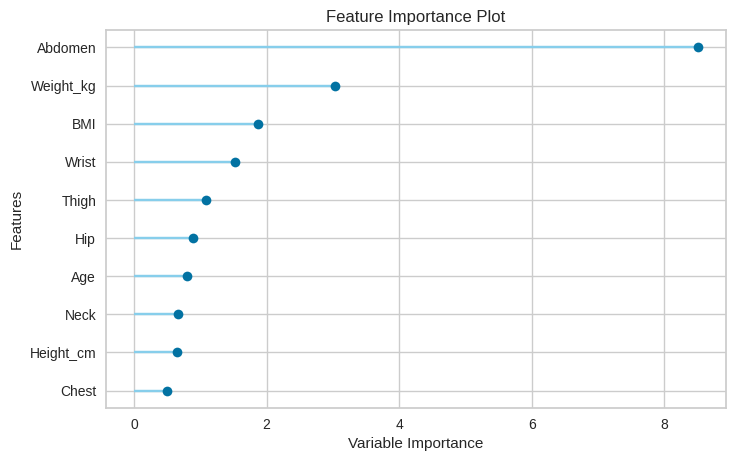

In [18]:
plot_model(ridge_model, plot='feature')

In [19]:
important_fea = ['Abdomen', 'Weight_kg', 'BMI', 'Wrist', 'Height_cm', 'BodyFat']

In [40]:
def preprocessing2(data):
  df = data.copy()

  df['Weight_kg'] = df.Weight * 0.45359237
  df['Height_cm'] = df.Height * 2.54
  df['BMI'] = df['Weight_kg'] / (df['Height_cm'] / 100) ** 2

  df = df.drop(df[df['BodyFat'] > 42].index[0], axis = 0)
  df = df.drop(df[df['BodyFat'] < 1].index[0], axis = 0)
  df = df.drop(df[df['BMI'] > 35].index.tolist(), axis = 0)


  df = df.drop(['Density','Weight','Height'], axis = 1)

  df = df[important_fea]

  X = df.drop('BodyFat', axis = 1)
  y = df['BodyFat']

  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 40)


  return X_train, X_test, y_train, y_test, df

In [41]:
X_train2, X_test2, y_train2, y_test2, df2 = preprocessing2(data)

In [22]:
df2

,Abdomen,Weight_kg,BMI,Wrist,Height_cm,BodyFat
0,85.2,69.966623,23.626799,17.1,172.085,12.3
1,83.0,78.584878,23.334358,18.2,183.515,6.1
2,87.9,69.853225,24.668757,16.6,168.275,25.3
3,86.4,83.801190,24.883247,18.2,183.515,10.4
4,100.0,83.574394,25.517379,17.7,180.975,28.7
...,...,...,...,...,...,...
247,83.6,60.894776,21.026307,18.5,170.180,11.0
248,105.0,91.172066,29.047311,20.1,177.165,33.6
249,111.5,84.708375,30.141929,18.0,167.640,29.3
250,101.3,86.522745,26.982651,19.8,179.070,26.0


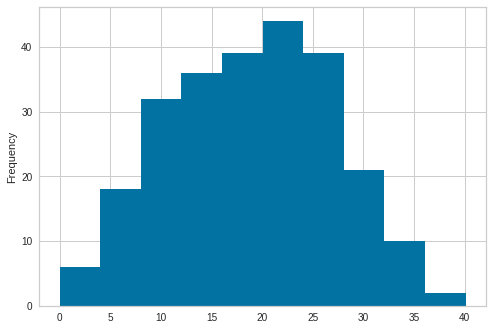

In [23]:
df2['BodyFat'].plot(kind = 'hist')

In [24]:
for name, model in algorithms.items():
  model.fit(X_train2, y_train2)
  score = model.score(X_test2, y_test2)
  pred = model.predict(X_test2)
  RMSE = mean_squared_error(y_test, pred, squared = False)
  R2 = r2_score(y_test, pred)

  print('********* Model : {}'.format(name))
  print('RMSE = {}'.format(RMSE))
  print('R2 = {}'.format(R2))

********* Model : linear_model
RMSE = 3.891784933769607
R2 = 0.7516237489519976
********* Model : Lasso
RMSE = 4.415740931919838
R2 = 0.6802433581593186
********* Model : RandomForestRegressor
RMSE = 5.015275434111269
R2 = 0.587520868910254
********* Model : Nueral_Network
RMSE = 11.149389196632159
R2 = -1.0385180177358064


In [25]:
s = setup(df2, target = 'BodyFat', session_id = 42, normalize = True)

,Description,Value
0,session_id,42
1,Target,BodyFat
2,Original Data,"(247, 6)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(172, 5)"


In [26]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,3.7845,20.2020,4.4657,0.6635,0.3139,0.2778,0.013
lr,Linear Regression,3.7924,20.3171,4.4696,0.6634,0.3090,0.2747,0.015
lar,Least Angle Regression,3.7924,20.3171,4.4696,0.6634,0.3090,0.2747,0.013
br,Bayesian Ridge,3.7920,20.2664,4.4729,0.6625,0.3141,0.2781,0.014
huber,Huber Regressor,3.8276,20.6587,4.5101,0.6572,0.3105,0.2733,0.018
omp,Orthogonal Matching Pursuit,3.9763,23.3368,4.8090,0.6051,0.3218,0.2907,0.012
lasso,Lasso Regression,4.0776,23.9725,4.8763,0.5961,0.3390,0.3132,0.016
ada,AdaBoost Regressor,4.0454,24.3079,4.9064,0.5933,0.3441,0.2996,0.079
et,Extra Trees Regressor,4.2162,26.2024,5.0688,0.5635,0.3517,0.3099,0.396
rf,Random Forest Regressor,4.2445,26.1480,5.0772,0.5617,0.3543,0.3116,0.414


In [27]:
lr_model2 = create_model('lr')

MAE      MSE    RMSE      R2   RMSLE    MAPE
Split  Fold                                                 
CV-Val 0     4.6205  26.8555  5.1822  0.6659  0.3307  0.3189
       1     4.0037  24.3637  4.9360  0.6110  0.4069  0.4411
       2     3.1278  14.6028  3.8214  0.8149  0.4465  0.1721
       3     3.4098  14.1082  3.7561  0.7183  0.2232  0.2036
       4     3.3830  16.1945  4.0242  0.7373  0.2769  0.2598
       5     4.0887  21.2654  4.6114  0.6107  0.2982  0.2875
       6     4.2522  23.5999  4.8580  0.5966  0.3355  0.3537
       7     3.4370  19.3295  4.3965  0.7280  0.3093  0.2932
       8     4.5420  28.9114  5.3769  0.5897  0.2787  0.2526
       9     3.0595  13.9401  3.7336  0.5618  0.1842  0.1646
       Mean  3.7924  20.3171  4.4696  0.6634  0.3090  0.2747
       Std   0.5487   5.2393  0.5826  0.0783  0.0739  0.0805
Train  NaN   3.6625  19.0565  4.3654  0.7092  0.3107  0.2681

In [28]:
predict_model(lr_model2)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,3.1011,14.7947,3.8464,0.75,0.2416,0.2124


,Abdomen,Weight_kg,BMI,Wrist,Height_cm,BodyFat,Label
0,0.915672,1.582816,1.763278,0.573179,0.253947,21.299999,23.358421
1,-0.092135,0.168795,0.362521,-0.513774,-0.214712,19.200001,18.584824
2,-0.811998,-0.340253,-0.650226,0.029702,0.441410,8.600000,12.034093
3,-0.524052,-0.019741,-0.590369,0.573179,1.003800,14.100000,13.131821
4,-1.542143,-1.509178,-1.536482,-1.383339,-0.589637,12.500000,9.253102
...,...,...,...,...,...,...,...
70,1.378440,0.253636,0.406756,-0.839862,-0.120979,28.000000,31.702835
71,-0.164121,0.027392,-0.484624,-0.078993,0.910069,20.100000,17.067345
72,-1.315900,-0.528789,-0.450006,-0.078993,-0.308443,8.800000,8.276759
73,-0.061284,-0.359107,0.175215,-0.296385,-0.964563,23.299999,19.756964


In [32]:
pipe

Pipeline(memory=None,
         steps=[('scaler',
                 <class 'sklearn.preprocessing._data.StandardScaler'>),
                ('regression',
                 <class 'sklearn.linear_model._base.LinearRegression'>)],
         verbose=False)

In [44]:
pipe = Pipeline(steps = [
                             ('scaler', StandardScaler()),
                             ('regression', LinearRegression())
])

pipe.fit(X_train2, y_train2)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('regression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [45]:
y_pred = pipe.predict(X_test2)
RMSE = mean_squared_error(y_test2, y_pred, squared = False)
R2 = r2_score(y_test2, y_pred)

print('Linear model R2 : {} , RMSE : {}'.format(R2,RMSE))


Linear model R2 : 0.7516237489519976 , RMSE : 3.891784933769607


In [46]:
import pickle

filename = 'linear_model.pkl'
pickle.dump(pipe, open(filename, 'wb'))